In [1]:
# This notebook looks at the Academy of Finland funding decisions for the Setember 2019 calls
# reads the funding decision(s), 
# builds a map with the word frequency from the titles of the funded research projects,
# generates a world cloud for visualisation
#
# Prepared by Octavian Andrei, 2020
#
#
# 2020-04-27: Council for Biosciences, Health and the Environment

In [2]:
import pandas as pd
import operator
import wordcloud
from matplotlib import pyplot as plt

## Customised functions

In [3]:
# handy functions
def readfile(file):
    """Reads the AKA decision into a dataframe object"""
    # read file
    data = pd.read_html(file)[0].dropna(axis=0, how='all').reset_index(drop=True)
    # split
    header = data.loc[:7, :].copy()
    data = data.loc[8:, :].copy()
    # cleansing
    data[6] = data[6].str.replace(" ","").astype('int')
    #data.columns = cols
    
    return header, data


def calculate_frequencies(text):
    """Returns word frequency map without punctuation and uninteresting words"""
    
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # split text in words
    words = [word.lower() for word in text.split()]

    frequencies = {}
    for word in words:
        # clean
        corrected_word = ''
        for c in word:
            if (c not in punctuations):
                corrected_word += c
        # disregard 
        if (corrected_word in uninteresting_words) or (len(corrected_word)<=3):
            continue
        # count
        frequencies[corrected_word] = frequencies.get(corrected_word, 0) + 1
    
    return frequencies



## Input data

In [4]:
# input datafiles
files = (
    'https://akareport.aka.fi/ibi_apps/WFServlet?IBIF_ex=x_RahPaatYht_report2&HAKU=201900000000789&TMK=BTY&LAJITTELU=PAATOS&UILANG=en', # BHE post-doc
    'https://akareport.aka.fi/ibi_apps/WFServlet?IBIF_ex=x_RahPaatYht_report2&HAKU=201900000000790&TMK=BTY&LAJITTELU=PAATOS&UILANG=en', # BHE fellow
)
cols = ['Applicant', 'Organisation', 'ProjectTitle', 'DecisionNo', 'DecisionDate', 'FundingPeriod', 'Amount']


## Working with one file

In [5]:
# Post-doc, BHE
header, df = readfile(files[0])

In [6]:
print(header.loc[2,1])
print(header.loc[3,1])

Research Council for Biosciences, Health and Environment
2019 Postdoctoral Researcher


In [7]:
# Who has received funding?
df[1].value_counts()

University of Helsinki                 15
University of Eastern Finland           8
University of Turku                     5
University of Jyväskylä                 1
Natural Resources Institute Finland     1
Tampere University                      1
Aalto University                        1
Finnish Meteorological Institute        1
Name: 1, dtype: int64

In [8]:
# How many projects
df[1].value_counts().sum(), header.loc[4,1]

(33, '33')

In [9]:
# How much funding?
df[6].sum(), header.loc[5,1]

(9000000, '9 000 000 €')

In [10]:
# 
text = ' '.join(df[2])
frequencies = calculate_frequencies(text)
cloud = wordcloud.WordCloud(scale=4)
cloud.generate_from_frequencies(frequencies)
cloud.to_file("aka.jpg")

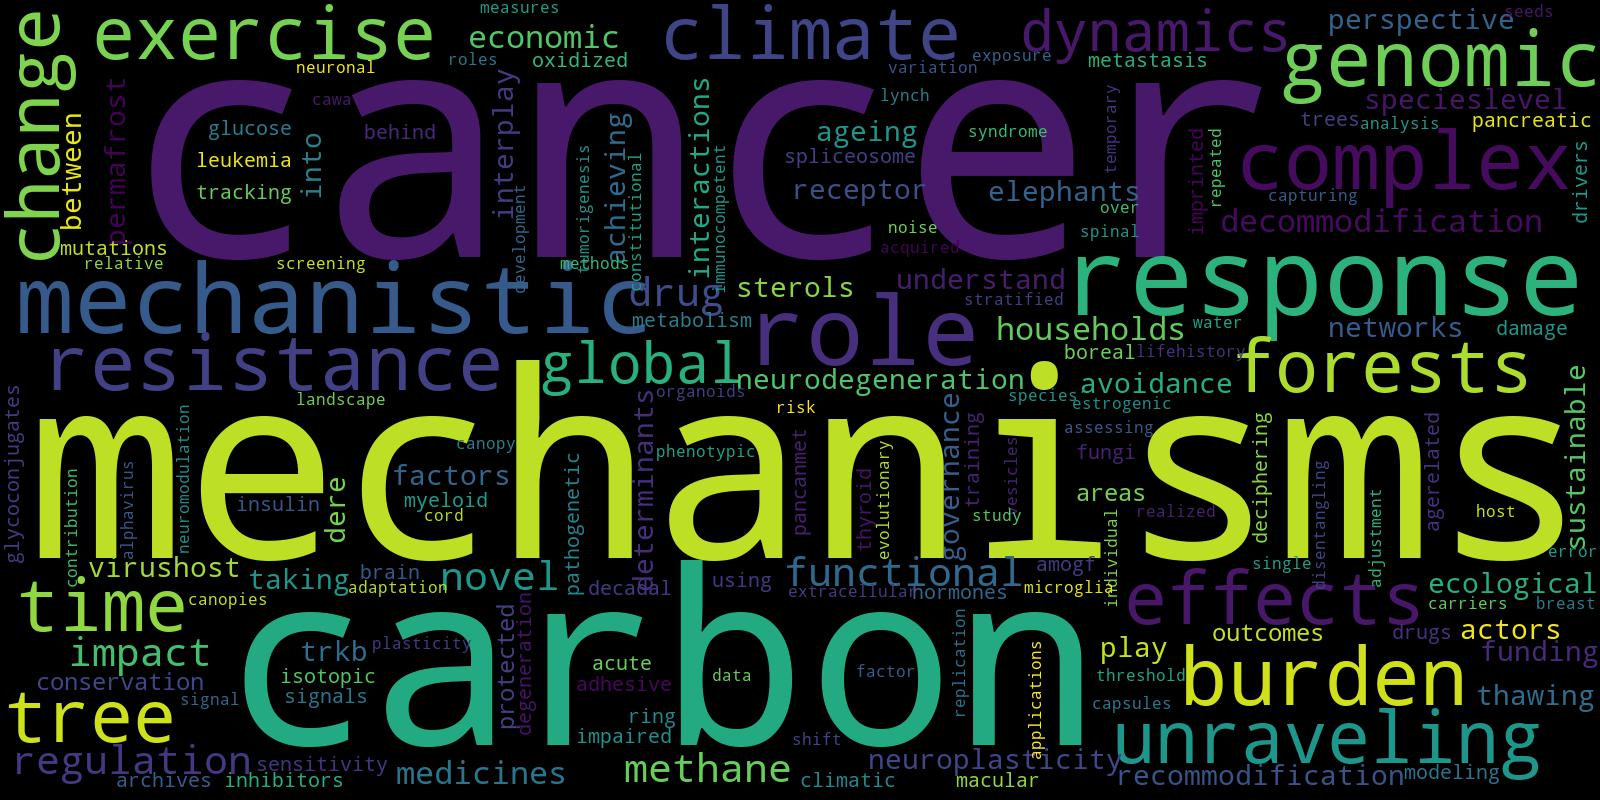

In [11]:
from IPython.display import Image
Image(filename='aka.jpg', width=400) 

In [12]:
# 
for file in files:
    data = readfile(file)
    print(data[0].loc[2,1])
    print(data[0].loc[3,1])
    print(data[0].loc[4,1])
    print()
    print(data[1][1].value_counts().to_string())
    print(('=')*10,'\n')

Research Council for Biosciences, Health and Environment
2019 Postdoctoral Researcher
33

University of Helsinki                 15
University of Eastern Finland           8
University of Turku                     5
University of Jyväskylä                 1
Natural Resources Institute Finland     1
Tampere University                      1
Aalto University                        1
Finnish Meteorological Institute        1

Research Council for Biosciences, Health and Environment
2019 Academy Research Fellow
24

University of Helsinki                  10
University of Turku                      4
University of Jyväskylä                  2
Natural Resources Institute Finland      2
Tampere University                       1
University of Eastern Finland            1
Aalto University                         1
University of Oulu                       1
Helsinki University Central Hospital     1
Finnish Meteorological Institute         1



## Research Council for Biosciences, Health and Environment

In [13]:
# Research Council for Biosciences, Health and Environment
z = dict()
for file in files[:2]:
    header, df = readfile(file)
    text = ' '.join(df[2])
    frequencies = calculate_frequencies(text)
    for k, v in frequencies.items():
        #print(k, v, frequencies.get(k, 0))
        z[k] = z.get(k, 0) + frequencies.get(k, 0)



sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:20]

[('mechanisms', 8),
 ('cancer', 7),
 ('carbon', 5),
 ('response', 4),
 ('global', 4),
 ('regulation', 4),
 ('functional', 4),
 ('cell', 4),
 ('complex', 3),
 ('mechanistic', 3),
 ('climate', 3),
 ('dynamics', 3),
 ('role', 3),
 ('impact', 3),
 ('novel', 3),
 ('drug', 3),
 ('cellular', 3),
 ('burden', 2),
 ('understand', 2),
 ('genomic', 2)]

In [14]:

cloud = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='white', 
    colormap='summer',
)
cloud.generate_from_frequencies(z)
cloud.to_file("aka.jpg")

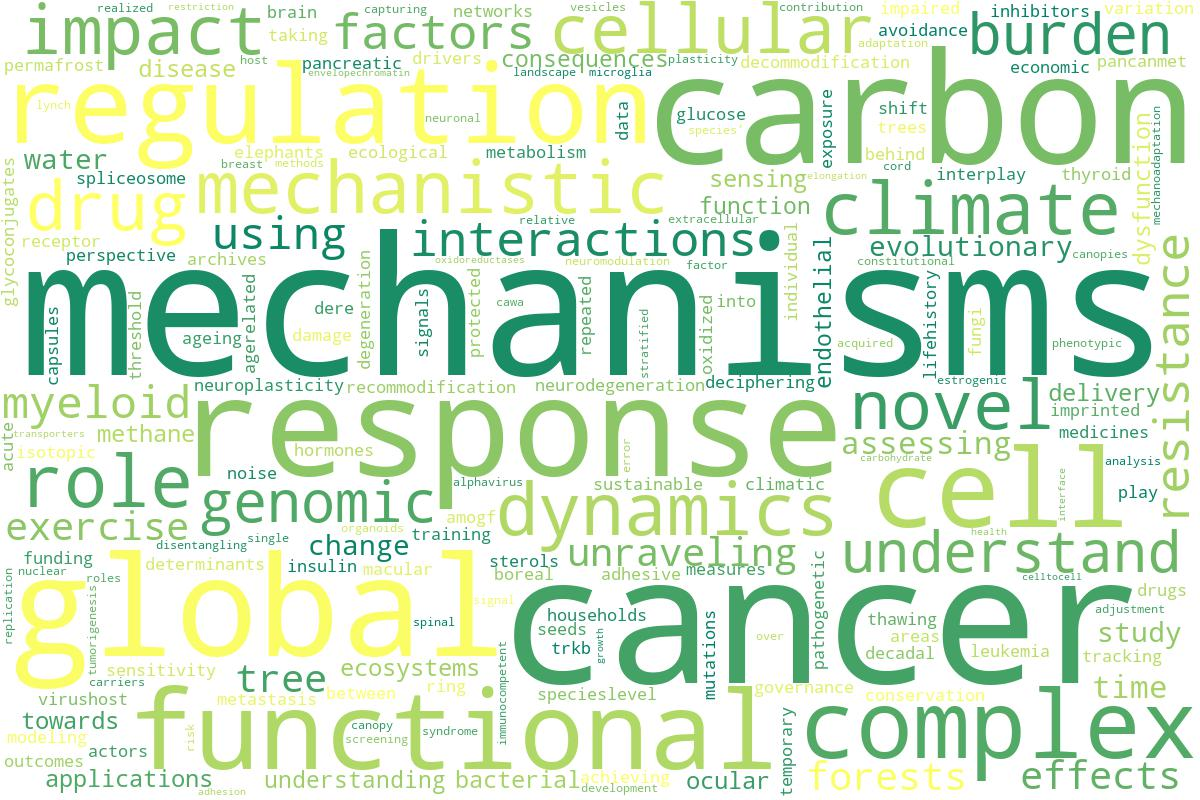

In [15]:
Image(filename='aka.jpg', width=600) 